In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
df=pd.read_csv("inventory_data_noisy.csv")
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18355,D001,P012,2022-02-19,71.0,15.0,Los Angeles
18356,D003,P014,2022-01-26,47.0,12.0,Los Angeles
18357,D001,P013,2022-02-14,89.0,8.0,Chicago
18358,D004,P017,2022-03-24,29.0,6.0,New York


In [3]:
#printing first 5 rows
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [4]:
#printing last 5 rows
df.tail()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
18355,D001,P012,2022-02-19,71.0,15.0,Los Angeles
18356,D003,P014,2022-01-26,47.0,12.0,Los Angeles
18357,D001,P013,2022-02-14,89.0,8.0,Chicago
18358,D004,P017,2022-03-24,29.0,6.0,New York
18359,D005,P003,2022-03-01,33.0,7.0,Chicago


**Data Preprocessing**

In [5]:
df.shape

(18360, 6)

In [6]:
#For basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    18360 non-null  object 
 1   Product_ID   18360 non-null  object 
 2   Date         18360 non-null  object 
 3   Quantity     18268 non-null  float64
 4   Consumption  18268 non-null  float64
 5   Location     18176 non-null  object 
dtypes: float64(2), object(4)
memory usage: 860.8+ KB


In [7]:
#For data types
df.dtypes

Dealer_ID       object
Product_ID      object
Date            object
Quantity       float64
Consumption    float64
Location        object
dtype: object

**Handling Missing Values**

In [8]:
#Finding missing values
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

In [9]:
#Filling Quantity Misiing values with mean
df['Quantity']=df['Quantity'].fillna(df['Quantity'].mean())

In [10]:
#Filling Consumption Misiing values with mean
df['Consumption']=df['Consumption'].fillna(df['Consumption'].mean())

In [11]:
df['Location']

0            Chicago
1            Chicago
2        Los Angeles
3        Los Angeles
4        Los Angeles
            ...     
18355    Los Angeles
18356    Los Angeles
18357        Chicago
18358       New York
18359        Chicago
Name: Location, Length: 18360, dtype: object

In [12]:
#Filling Location with mode as it is Categorical Data
df['Location']=df['Location'].fillna(df['Location'].mode().iloc[0])

In [13]:
#Missing values
df.isna().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

**Duplicates identification and Dropping**

In [14]:
#Finding Duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18355     True
18356     True
18357     True
18358     True
18359     True
Length: 18360, dtype: bool

In [15]:
#Dropping duplicates
df=df.drop_duplicates()

In [16]:
#Checking Duplicates
df.duplicated().sum()

0

In [17]:
df.info()#Basic info

<class 'pandas.core.frame.DataFrame'>
Index: 18011 entries, 0 to 18343
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    18011 non-null  object 
 1   Product_ID   18011 non-null  object 
 2   Date         18011 non-null  object 
 3   Quantity     18011 non-null  float64
 4   Consumption  18011 non-null  float64
 5   Location     18011 non-null  object 
dtypes: float64(2), object(4)
memory usage: 985.0+ KB


**Checking Unique Values**

In [18]:
df.nunique()

Dealer_ID      10
Product_ID     20
Date           90
Quantity       92
Consumption    17
Location        3
dtype: int64

**Statistical Summary**

In [19]:
df.describe()

,Quantity,Consumption
count,18011.000000,18011.000000
mean,59.231732,12.952437
std,71.490048,13.394357
min,10.000000,5.000000
25%,32.000000,8.000000
50%,55.000000,12.000000
75%,77.000000,16.000000
max,990.000000,190.000000


**Changing DataTypes**

In [26]:
#Spliting date into year month and date such that we can access the details for certain month or year
df.loc[:,'Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.loc[:, 'Year'] = df['Date'].dt.year
df.loc[:, 'Month'] = df['Date'].dt.month
df.loc[:, 'Day'] = df['Date'].dt.date

KeyError: 'Date'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18011 entries, 0 to 18343
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Dealer_ID    18011 non-null  object        
 1   Product_ID   18011 non-null  object        
 2   Date         17609 non-null  datetime64[ns]
 3   Quantity     18011 non-null  float64       
 4   Consumption  18011 non-null  float64       
 5   Location     18011 non-null  object        
 6   Year         17609 non-null  float64       
 7   Month        17609 non-null  float64       
 8   Day          17609 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.4+ MB


In [22]:
#As we created separate columns for year date month we can delete date column to avoid redundancy of data
df=df.drop('Date',axis=1)

In [29]:
#Displaying Columns
df.columns

Index(['Dealer_ID', 'Product_ID', 'Quantity', 'Consumption', 'Location',
       'Year', 'Month', 'Day'],
      dtype='object')

In [30]:
#Conversion of float to int
df['Year'] = df['Year'].fillna(0).astype(int)
df['Month'] = df['Month'].fillna(0).astype(int)
df['Day'] = df['Day'].fillna(0).astype(int)

In [31]:
df.dtypes

Dealer_ID       object
Product_ID      object
Quantity       float64
Consumption    float64
Location        object
Year             int64
Month            int64
Day              int64
dtype: object

In [32]:
df.isna().sum()

Dealer_ID      0
Product_ID     0
Quantity       0
Consumption    0
Location       0
Year           0
Month          0
Day            0
dtype: int64

In [33]:
df

,Dealer_ID,Product_ID,Quantity,Consumption,Location,Year,Month,Day
0,D000,P000,62.000000,8.000000,Chicago,2022,1,1
1,D000,P000,70.000000,9.000000,Chicago,2022,1,2
2,D000,P000,12.000000,17.000000,Los Angeles,2022,1,3
3,D000,P000,74.000000,13.000000,Los Angeles,2022,1,4
4,D000,P000,57.000000,10.000000,Los Angeles,2022,1,5
...,...,...,...,...,...,...,...,...
18253,D008,P013,59.105704,12.938526,New York,0,0,0
18264,D001,P010,26.000000,18.000000,Chicago,2022,1,27
18328,D001,P014,30.000000,5.000000,Chicago,2022,1,14
18337,D001,P013,48.000000,15.000000,Chicago,2022,1,26


**Checking For Outliers**

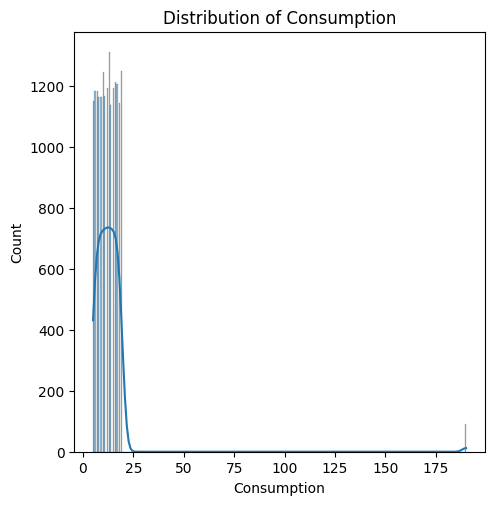

In [41]:
#Using Histplot and subplot
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
sns.histplot(df['Consumption'],kde=True)
plt.title("Distribution of Consumption")
plt.show()

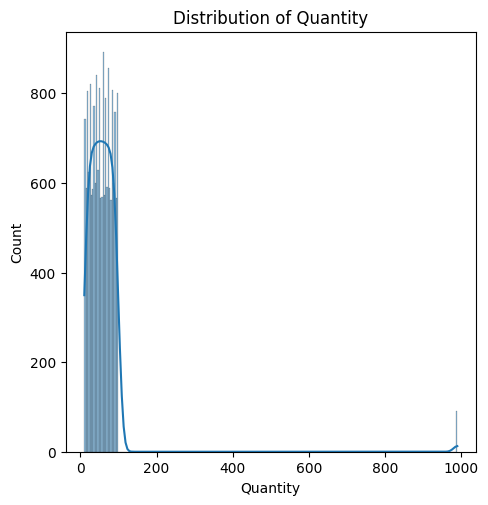

In [43]:
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
sns.histplot(df['Quantity'],kde=True)
plt.title("Distribution of Quantity")
plt.show()

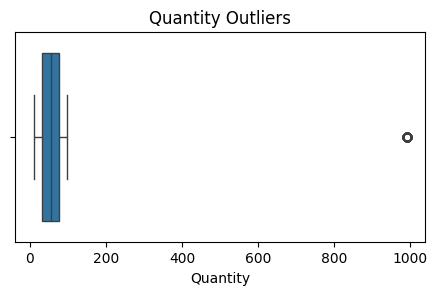

In [47]:
#Using Box plot to Visualise Outliers
plt.figure(figsize=(18,6))
plt.subplot(2,3,1)
sns.boxplot(x=df['Quantity'])
plt.title('Quantity Outliers')
plt.show()

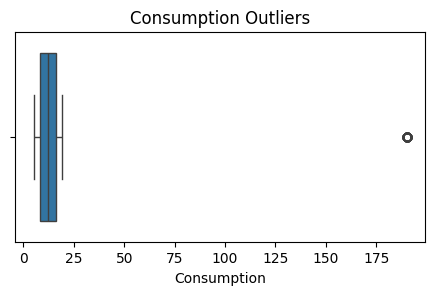

In [48]:
plt.figure(figsize=(18,6))
plt.subplot(2,3,1)
sns.boxplot(x=df['Consumption'])
plt.title('Consumption Outliers')
plt.show()


**Handling Outliers using IQR**

In [49]:
#Removing outliers
# Define a function to remove outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'Quantity')
df = remove_outliers_iqr(df, 'Consumption')

**Checking for Outliers are removed using Boxplot and Histogram**

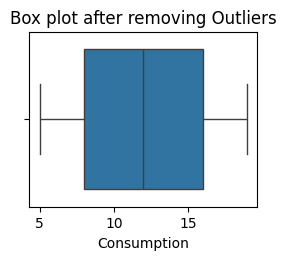

In [50]:
#After removing Outliers
plt.figure(figsize=(10,5))
plt.subplot(2,3,3)
sns.boxplot(x=df['Consumption'])
plt.title("Box plot after removing Outliers")
plt.show()

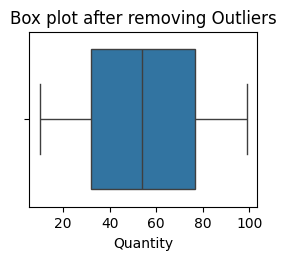

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
sns.boxplot(x=df['Quantity'])
plt.title("Box plot after removing Outliers")
plt.show()

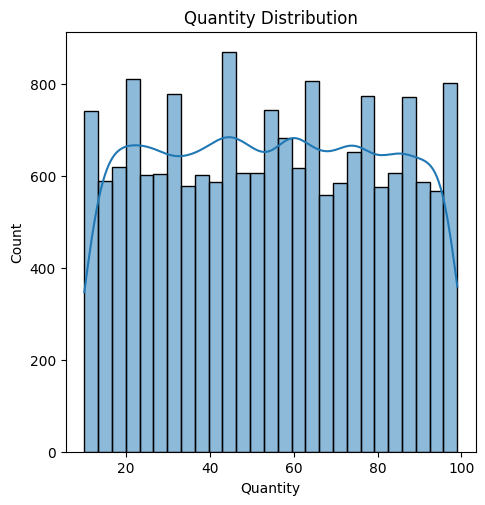

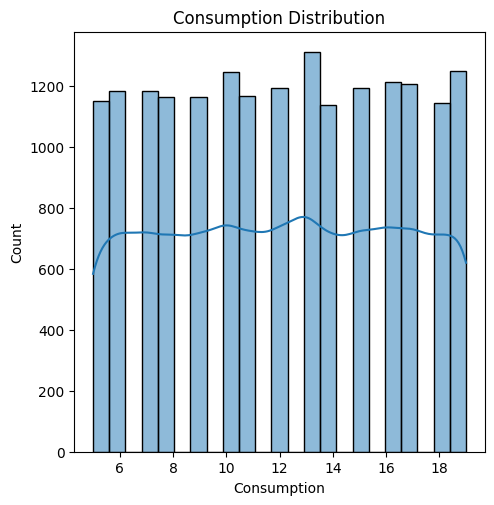

In [58]:
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
sns.histplot(df['Quantity'], kde=True)
plt.title("Quantity Distribution")
plt.show()

plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
sns.histplot(df['Consumption'], kde=True)
plt.title("Consumption Distribution")
plt.show()

**MultiVariate Analysis**

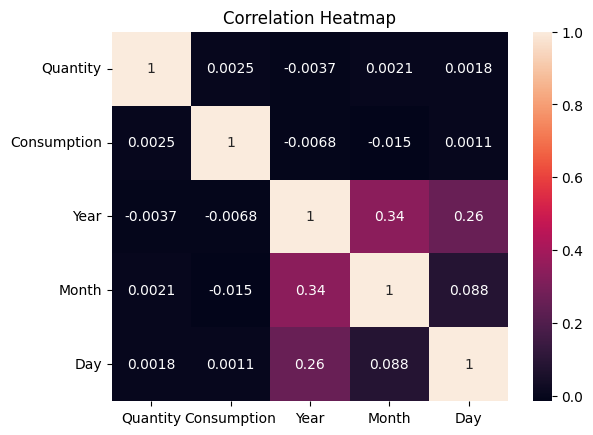

In [59]:
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='rocket')
plt.title("Correlation Heatmap")
plt.show()


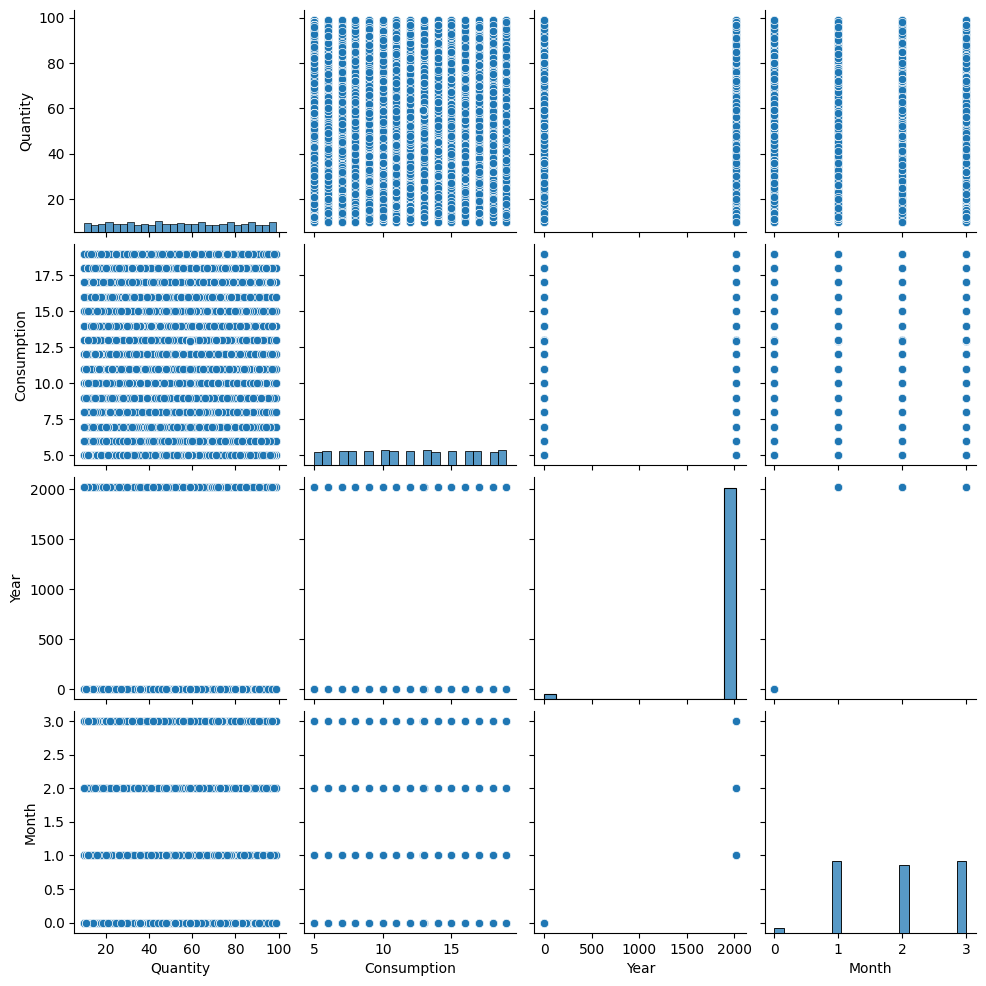

In [60]:
sns.pairplot(df[['Quantity', 'Consumption', 'Year', 'Month']])
plt.show()

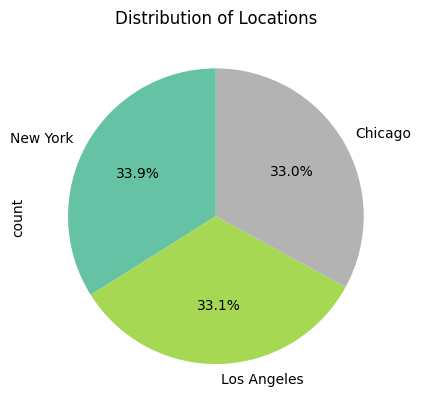

In [61]:
df['Location'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title("Distribution of Locations")
plt.show()


In [62]:
df.columns

Index(['Dealer_ID', 'Product_ID', 'Quantity', 'Consumption', 'Location',
       'Year', 'Month', 'Day'],
      dtype='object')

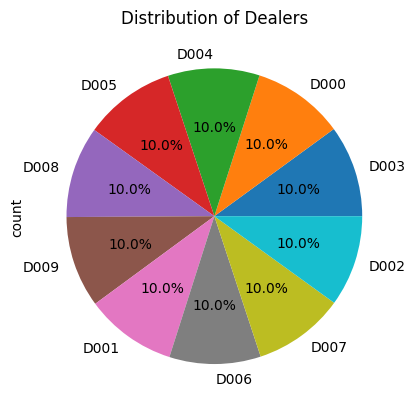

In [63]:
df['Dealer_ID'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribution of Dealers")
plt.show()